In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xk = np.linspace(0,1,5)
x = np.linspace(0,1,100)
def true_fn(x):
    #return 2*x**2 - np.cos(2*np.pi*x)*np.sin(3*np.pi*x)
    return x**2 -x- np.cos(np.pi*x)

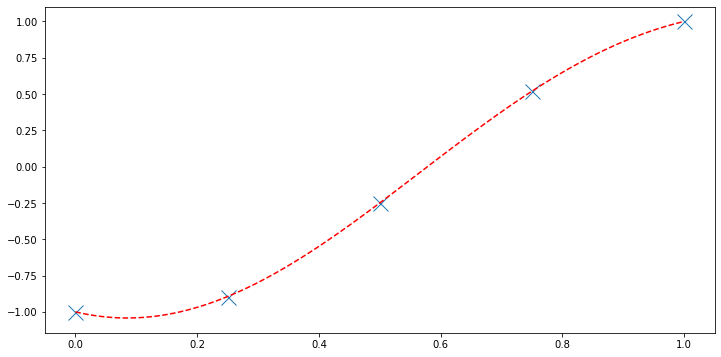

In [3]:
plt.figure(figsize=(12,6))
plt.plot(xk,true_fn(xk),'x',markersize = 15)
plt.plot(x,true_fn(x),'--r')

## Using Radial Basis Function

In [4]:
(xk.reshape(-1,1) - xk.reshape(1,-1))

array([[ 0.  , -0.25, -0.5 , -0.75, -1.  ],
       [ 0.25,  0.  , -0.25, -0.5 , -0.75],
       [ 0.5 ,  0.25,  0.  , -0.25, -0.5 ],
       [ 0.75,  0.5 ,  0.25,  0.  , -0.25],
       [ 1.  ,  0.75,  0.5 ,  0.25,  0.  ]])

In [5]:
xk.reshape(-1,1)

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

In [6]:
xk.reshape(1,-1)

array([[0.  , 0.25, 0.5 , 0.75, 1.  ]])

In [7]:
def euclidian_dist(x,xk):
    return np.sqrt((x.reshape(-1,1) - xk.reshape(1,-1))**2)

In [8]:
euclidian_dist(xk,xk)

array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.25, 0.  , 0.25, 0.5 , 0.75],
       [0.5 , 0.25, 0.  , 0.25, 0.5 ],
       [0.75, 0.5 , 0.25, 0.  , 0.25],
       [1.  , 0.75, 0.5 , 0.25, 0.  ]])

In [9]:
def gauss_rbf(radius,eps):
    return np.exp(-(eps*radius)**2)

In [10]:
gauss_rbf(euclidian_dist(xk,xk),2)

array([[1.        , 0.77880078, 0.36787944, 0.10539922, 0.01831564],
       [0.77880078, 1.        , 0.77880078, 0.36787944, 0.10539922],
       [0.36787944, 0.77880078, 1.        , 0.77880078, 0.36787944],
       [0.10539922, 0.36787944, 0.77880078, 1.        , 0.77880078],
       [0.01831564, 0.10539922, 0.36787944, 0.77880078, 1.        ]])

In [11]:
class RBFInterp(object):
    def __init__(self,eps):
        self.eps = eps
    def fit(self,xk,yk):
        self.xk = xk
        transformation = gauss_rbf(euclidian_dist(xk,xk),self.eps)
        self.w_ = np.linalg.solve(transformation,yk)
    def __call__(self,xn):
        transformation = gauss_rbf(euclidian_dist(xn,xk),self.eps)
#         print(transformation.shape)
        return transformation.dot(self.w_)

In [12]:
interp = RBFInterp(2)

In [13]:
yk = true_fn(xk)

In [14]:
interp.fit(xk,yk)

In [15]:
rbf_weights = interp.w_
print('Radial Basis Weights = ', rbf_weights)

Radial Basis Weights =  [-0.29895242 -1.35307004  1.19722218 -1.10462673  1.56793877]


In [16]:
interp(xk)

array([-1.        , -0.89460678, -0.25      ,  0.51960678,  1.        ])

In [17]:
interp(x)

array([-1.        , -1.00779115, -1.01468846, -1.02066467, -1.02569438,
       -1.02975402, -1.03282205, -1.03487898, -1.03590745, -1.0358923 ,
       -1.03482063, -1.03268182, -1.02946759, -1.02517201, -1.0197915 ,
       -1.01332485, -1.00577321, -0.99714004, -0.98743112, -0.97665448,
       -0.96482038, -0.95194119, -0.93803141, -0.9231075 , -0.90718786,
       -0.89029271, -0.87244399, -0.85366526, -0.83398159, -0.81341946,
       -0.7920066 , -0.76977191, -0.74674534, -0.72295773, -0.69844074,
       -0.67322669, -0.64734844, -0.62083931, -0.59373295, -0.56606322,
       -0.5378641 , -0.5091696 , -0.48001366, -0.45043009, -0.42045245,
       -0.39011403, -0.35944778, -0.32848623, -0.2972615 , -0.26580522,
       -0.23414853, -0.20232204, -0.17035587, -0.1382796 , -0.1061223 ,
       -0.07391254, -0.0416784 , -0.00944751,  0.0227529 ,  0.05489603,
        0.0869554 ,  0.11890484,  0.15071845,  0.18237055,  0.21383563,
        0.24508831,  0.27610328,  0.3068553 ,  0.33731911,  0.36

## Using Polynomial Basis Function

In [18]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [19]:
xk1 = xk.reshape(-1,1)
print(xk1)

[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]


In [20]:
poly = PolynomialFeatures(5)

In [21]:
model = LinearRegression()

In [22]:
poly_features = poly.fit_transform(xk1)
print(poly_features)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.50000000e-01 6.25000000e-02 1.56250000e-02
  3.90625000e-03 9.76562500e-04]
 [1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
  6.25000000e-02 3.12500000e-02]
 [1.00000000e+00 7.50000000e-01 5.62500000e-01 4.21875000e-01
  3.16406250e-01 2.37304688e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]


In [23]:
model.fit(poly_features,yk)

LinearRegression()

In [24]:
y_pred = model.predict(poly_features)

In [25]:
print(y_pred)

[-1.         -0.89460678 -0.25        0.51960678  1.        ]


In [26]:
class PBFInterp(object):
    def __init__(self,xn,degree):
        self.poly = PolynomialFeatures(degree)
    def fit(self,xk,yk):
        self.xk = xk.reshape(-1,1)
        self.model = LinearRegression()
        poly_features = self.poly.fit_transform(self.xk)
        self.model.fit(poly_features,yk)
    def __call__(self,xn):
        self.xn = xn.reshape(-1,1)
        poly_features = self.poly.fit_transform(self.xn)
        y_pred = self.model.predict(poly_features)
        return y_pred

In [27]:
Interpbf = PBFInterp(xk,5)

In [28]:
Interpbf.fit(xk,yk)

In [29]:
Interpbf(x)

array([-1.        , -1.01035853, -1.01936981, -1.0270455 , -1.03339797,
       -1.03844035, -1.04218646, -1.04465086, -1.04584874, -1.04579598,
       -1.04450913, -1.04200535, -1.03830243, -1.03341876, -1.02737331,
       -1.02018566, -1.01187589, -1.00246468, -0.99197319, -0.98042311,
       -0.96783662, -0.9542364 , -0.93964554, -0.92408764, -0.90758669,
       -0.89016712, -0.87185372, -0.85267173, -0.83264669, -0.81180454,
       -0.79017154, -0.76777428, -0.74463964, -0.7207948 , -0.69626722,
       -0.67108461, -0.64527494, -0.61886637, -0.59188732, -0.56436636,
       -0.53633229, -0.50781402, -0.47884066, -0.44944142, -0.41964563,
       -0.38948274, -0.35898228, -0.32817384, -0.29708706, -0.26575166,
       -0.23419733, -0.2024538 , -0.17055078, -0.13851798, -0.10638503,
       -0.07418153, -0.04193701, -0.00968092,  0.02255742,  0.05474878,
        0.08686407,  0.11887436,  0.15075087,  0.18246502,  0.2139884 ,
        0.24529283,  0.27635036,  0.30713326,  0.33761409,  0.36

In [30]:
pbf_weights = Interpbf.model.coef_
print("Polynomial Basis Weights =", pbf_weights)

Polynomial Basis Weights = [ 8.57092175e-14 -1.09254871e+00  6.65583129e+00 -1.69783803e+00
 -3.10907425e+00  1.24362970e+00]


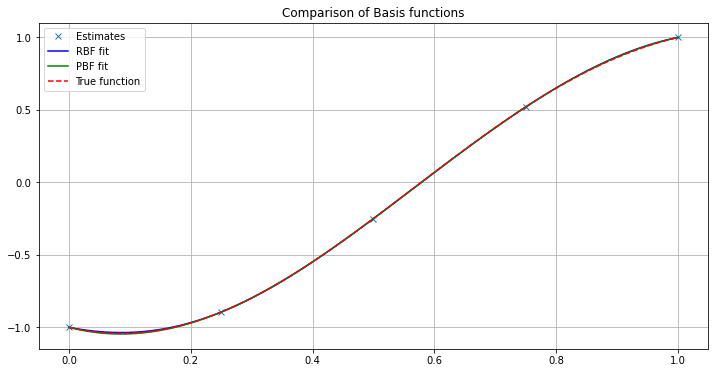

In [31]:
plt.figure(figsize = (12,6))
plt.plot(xk,yk, 'x',label = 'Estimates')
plt.plot(x, interp(x),'b', label = 'RBF fit')
plt.plot(x, Interpbf(x),'g', label = 'PBF fit')
plt.plot(x, true_fn(x),'--r', label = 'True function')
plt.title('Comparison of Basis functions')
plt.grid()
plt.legend()